![](https://images.idgesg.net/images/article/2021/02/conceptual_trend_lines_data_tracking_monitoring_analytics_forecasting_future_whats_next_by_solarseven_gettyimages-1213574690_2400x1600-100877726-large.jpg?auto=webp&quality=85,70)

### Standard Descriptive Statistics in Time Series

**Dickey-Fuller Test**
- Null hypothesis states that phi = 1 (the unit test).
- If p-value is high (>0.05) we **fail to reject** the null hypothesis

**Granger Causality Test**
- The Granger causality test is a hypothesis test to determine if one time series is useful in forecasting another.
- Its fairly simple to meausre correlations between time series, its hard to observe changes in one series as they are correlated to changes in another after a consistent amount of time.

There are:
- MAE
- MSE
- RMSE

Other Metrics (Information Criterion):

**Akaike Information Criterion (AIC):**
- Developed by Hirotugu Akaike in 1971
- His publication is one of the 100 most cited publications of all time
- AIC is such a common metric that most writers don't even associate it with the paper anymore
- AIC evaluates a collection of models and estiamtes the quality of each model relative to the others. Prefers simple models as opposed to overly complex ones.
- Assigns penalties for the number of parameters used to combat overfitting


**Bayesian Information Criterion (BIC):**
- Developed in 1978 by Gideon Schwarz, similar to AIC

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ignore the unimportant warnings
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests as gct

In [3]:
# Loading a seasonal dataset for analysis
df1 = pd.read_csv('../Data/airline_passengers.csv', index_col = 'Month', parse_dates = True)

# Loading a nonseasonal dataset for analysis
df2 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv', index_col = 'Date', parse_dates = True)
df2.index.freq = 'D' 

In [9]:
df1.describe()

,Thousands of Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [11]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
df2.describe()

,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [12]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


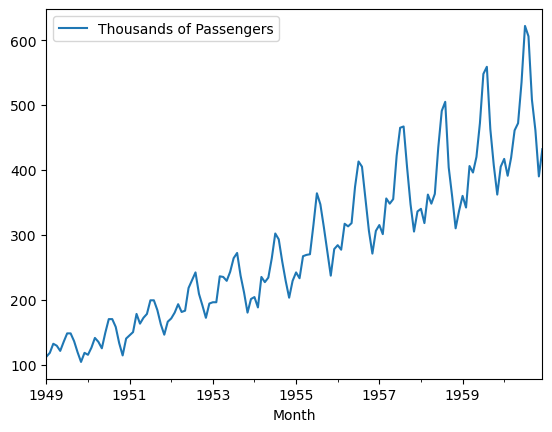

In [22]:
df1.plot(legend = True); # Exhibits upward trend and seasonality

In [5]:
# Let's see if df1 is stationary or not; my hypothesis is that it isn't
# Using Augmented Dickey-Fuller Test Root Test
adfuller(df1['Thousands of Passengers'])

(0.8153688792060446,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [16]:
dftest = adfuller(df1['Thousands of Passengers'])
dfout = pd.Series(dftest[0:4], index = ['ADF Test Statistic', 'P-value', 'Number of Lags Used', 'Number of Observations'])

In [17]:
for key, val in dftest[4].items():
    dfout[f'Critical value {key}'] = val

In [33]:
"""
These are the outputs for the test and what they correspond to.
The data is **not** stationary as the p-value is greater than 0.05. 
Fail to reject the null hypothesis.
We can safely say that this data has a unit root.
"""
dfout

ADF Test Statistic         -4.808291
P-value                     0.000052
Number of Lags Used         6.000000
Number of Observations    358.000000
Critical value 1%          -3.448749
Critical value 5%          -2.869647
Critical value 10%         -2.571089
dtype: float64

Note:

**When the p-value is less than 0.05:**
- Interpretation of the ADF Test is mostly based on P-value. 
- We have strong evidence against the null hypothesis.
- Data doesn't have a unit root and we know that the data is stationary.

**When the p-value is greater than 0.05**
- There is weak evidence against the null hypothesis.
- Thus, you fail to reject the null hypothesis.
- The data has a unit root and the data is not stationary.

<Axes: xlabel='Date'>

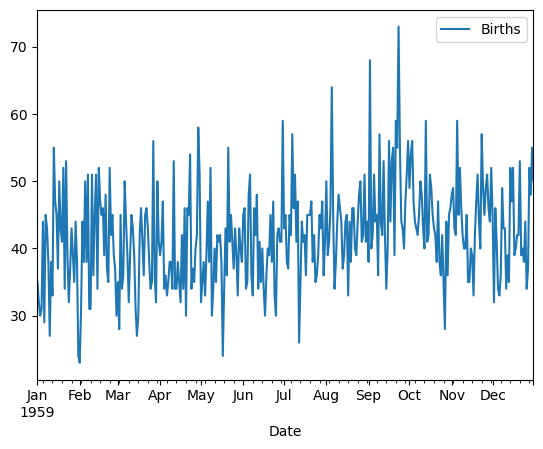

In [23]:
# Harder to discern the stationarity of this plot; let's test it.
df2.plot(legend = True) 

In [27]:
dftest = adfuller(df2['Births'])
dfout = pd.Series(dftest[0:4], index = ['ADF Test Statistic', 'P-value', 'Number of Lags Used', 'Number of Observations'])
for key, val in dftest[4].items():
    dfout[f'Critical value {key}'] = val

In [32]:
"""
There is sufficiently strong evidence against the null hypothesis.
We reject the null hypothesis in this case.
The data does have a unit root and we know the data is stationary.
"""

dfout

ADF Test Statistic         -4.808291
P-value                     0.000052
Number of Lags Used         6.000000
Number of Observations    358.000000
Critical value 1%          -3.448749
Critical value 5%          -2.869647
Critical value 10%         -2.571089
dtype: float64

Note:

**When the p-value is less than 0.05:**
- Interpretation of the ADF Test is mostly based on P-value. 
- We have strong evidence against the null hypothesis.
- Data doesn't have a unit root and we know that the data is stationary.

**When the p-value is greater than 0.05**
- There is weak evidence against the null hypothesis.
- Thus, you fail to reject the null hypothesis.
- The data has a unit root and the data is not stationary.

In [35]:
df3 = pd.read_csv('../Data/samples.csv', index_col = 0, parse_dates = True)
df3.index.freq = 'MS'

<Axes: >

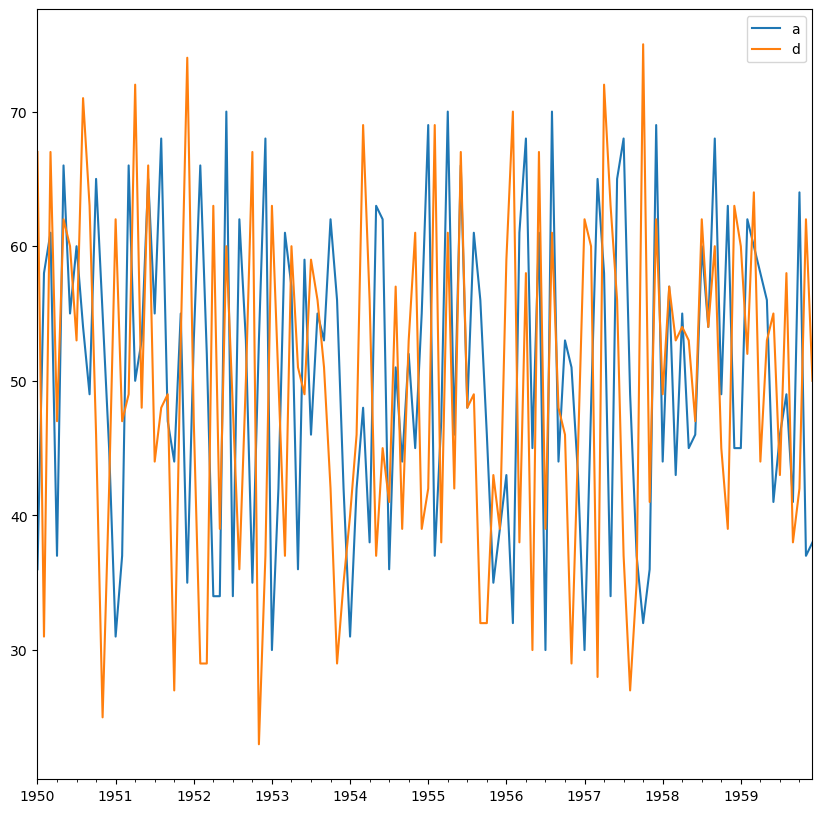

In [36]:
# You can't discern causality from a cursory glance.
df3[['a', 'd']].plot(figsize = (10, 10))

<Axes: >

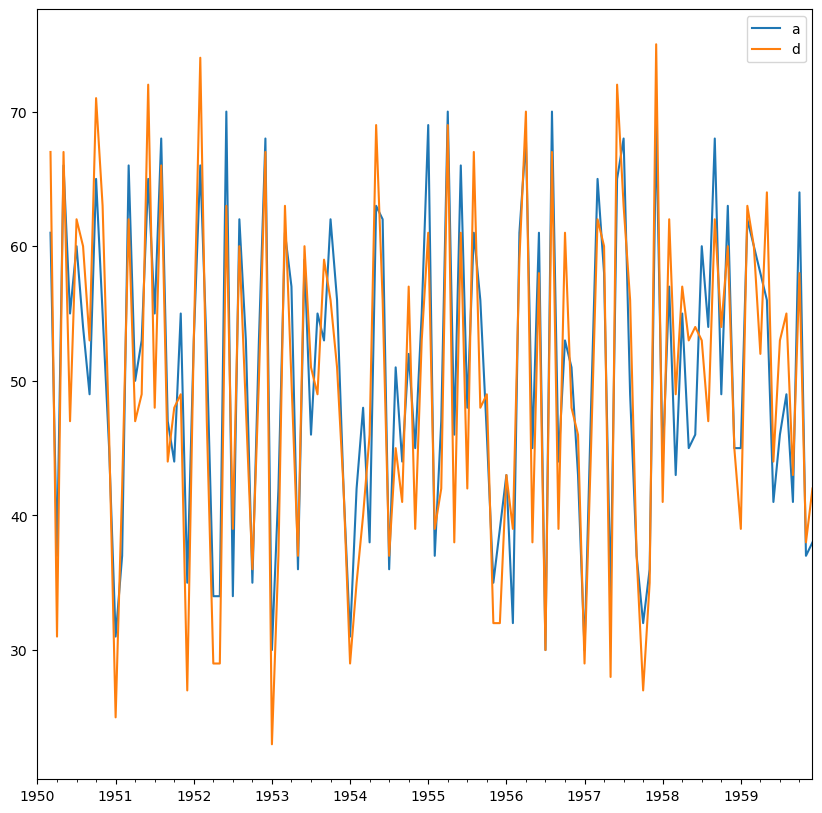

In [39]:
# Plot a and d column starting at a new position
# Strangely aligned after a 2-day shift in d; suggest causality
df3['a'].iloc[2:].plot(figsize = (10, 10), legend = True)
df3['d'].shift(2).plot(figsize = (10, 10), legend = True)

In [50]:
"""Greater maxlag indicates more opportunities for causality to pop up.
Looking for small p-values which we see at lag 2 and onward
There is a clear showing of causality between these features."""
gct(df3[['a', 'd']], maxlag = 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=136.1258, p=0.0000  

{1: ({'ssr_ftest': (1.7051251051681524, 0.1942027811635636, 116.0, 1),
   'ssr_chi2test': (1.749223168232846, 0.18597442074423703, 1),
   'lrtest': (1.7364915553187075, 0.18758398456227507, 1),
   'params_ftest': (1.7051251051681247, 0.1942027811635669, 116.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (286.03394262556105, 6.02536201568076e-45, 113.0, 2),
   'ssr_chi2test': (597.3806235365699, 1.9074176679051143e-130, 2),
   'lrtest': (212.65135382912, 6.65802208467127e-47, 2),
   'params_ftest': (286.03394262555787, 6.025362015683911e-45, 113.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (188.74462328616232, 3.2288482941468295e-43, 110.0, 3),
   'ssr_chi2test': (602.266934304027, 3.250504587468671e-130, 3),
   'lrtest': (212.4788575746154, 8.480665715595584e-46, 3),
   'params_ftest': (188.7446232861596, 3.228848294148977e-43, 110.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
    

In [49]:
"""
We do not have causality between these two features.
"""

gct(df3[['b', 'd']], maxlag = 4);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7084  , p=0.5879  

In [55]:
"""
Set the random seed for NumPy's random number generator to a 42.
Setting a random seed ensures the sequence of random numbers generated will be
the same every time the code is run. Often used for reproducibility.
"""
np.random.seed(42) 

"""
Generates a NumPy array filled with random integers. The arguments are:
- 20: the lower bound (inclusive) for the random integers.
- 30: the upper bound (exclusive) for the random integers.
- (50, 2): specifies the shape of the array

- columns = ['test', 'predictions'] indicates the names of the columns

So, code generates a DataFrame 'df' with 50 rows, 2 columns where
values in each column are random integers b/w 20 (inclusive) and (30)
"""
df = pd.DataFrame(np.random.randint(20, 30, (50, 2)), columns = ['test', 'predictions'])

In [56]:
df.head()

,test,predictions
0,26,23
1,27,24
2,26,29
3,22,26
4,27,24


<Axes: >

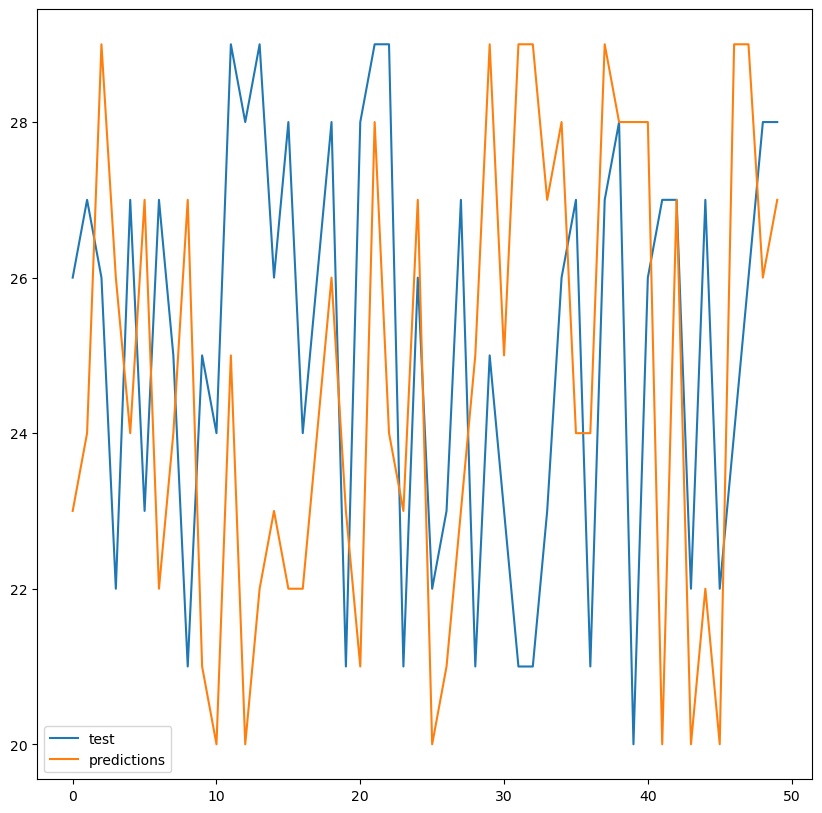

In [57]:
df.plot(figsize=(10, 10))

In [58]:
from statsmodels.tools.eval_measures import meanabs, mse, rmse

In [59]:
mse(df['test'], df['predictions'])

17.02

In [60]:
rmse(df['test'], df['predictions'])

4.125530268947253

In [61]:
meanabs(df['test'], df['predictions'])

3.54

<Axes: xlabel='Month'>

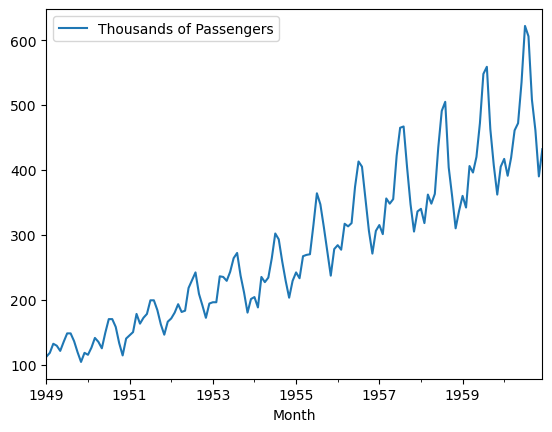

In [62]:
df = pd.read_csv('../Data/airline_passengers.csv', index_col = 'Month', parse_dates = True)
df.index.freq = 'MS'
df.plot()

In [63]:
from statsmodels.graphics.tsaplots import quarter_plot, month_plot

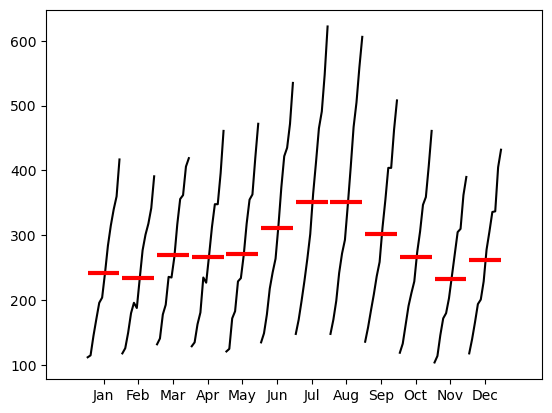

In [64]:
"""
Performs a groupby like operation plotting the 
range of values and the average by month.
"""
month_plot(df['Thousands of Passengers']);

In [65]:
# Let's do a quarterly resampling
dfq = df['Thousands of Passengers'].resample(rule = 'Q').mean()

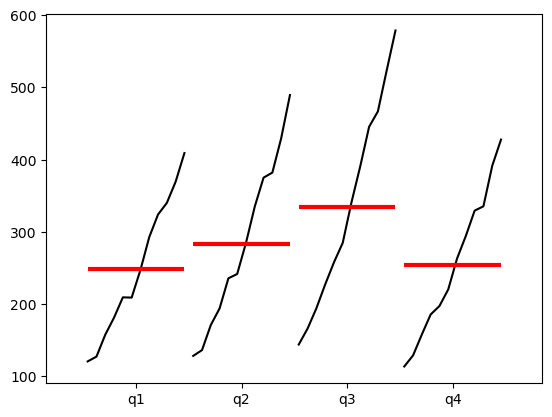

In [66]:
quarter_plot(dfq);